In [69]:
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

In [37]:
from sklearn.datasets import load_digits

In [38]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

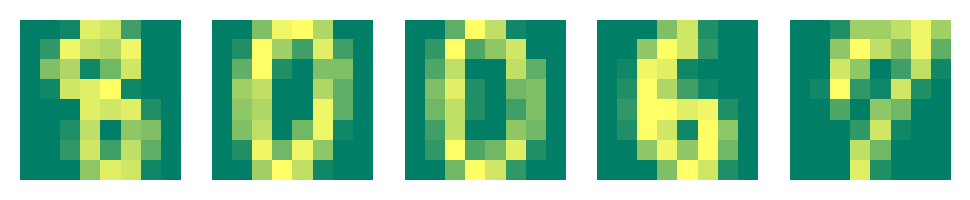

In [39]:
fig, ax_array = plt.subplots(1, 5)
fig.set_dpi(200)
axes = ax_array.flatten()
rand = random.sample(range(len(digits['images'])),5)
for i,ax in enumerate(axes):
    ax.imshow(digits.images[rand[i]], cmap='summer')
plt.setp(axes, xticks=[], yticks=[], frame_on=False);

In [40]:
print(digits.data.shape)

(1797, 64)


In [70]:
def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='coolwarm', s=4)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

In [71]:
# A) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the digits dataset

In [72]:
# tsne model reducing data to 3 dimensions
tsne = TSNE(3)  
tsne_embedding = tsne.fit_transform(digits.data)
print(tsne_embedding.shape)

(1797, 3)


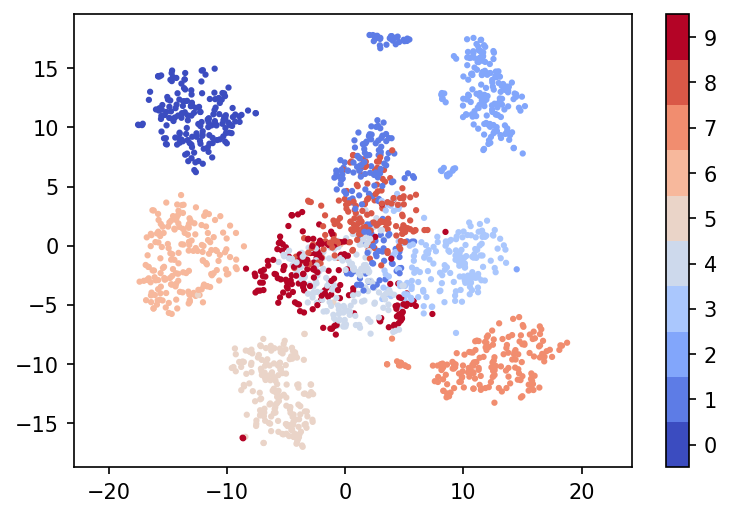

In [73]:
# tsne plot
plot_reduced_data(tsne_embedding, digits.target)

In [74]:
# isomap model
model2 = manifold.Isomap(n_neighbors=2, n_jobs=3, n_components=3)
model2.fit(digits.data)
isomap_embedding = model2.transform(digits.data)
isomap_embedding.shape

(1797, 3)

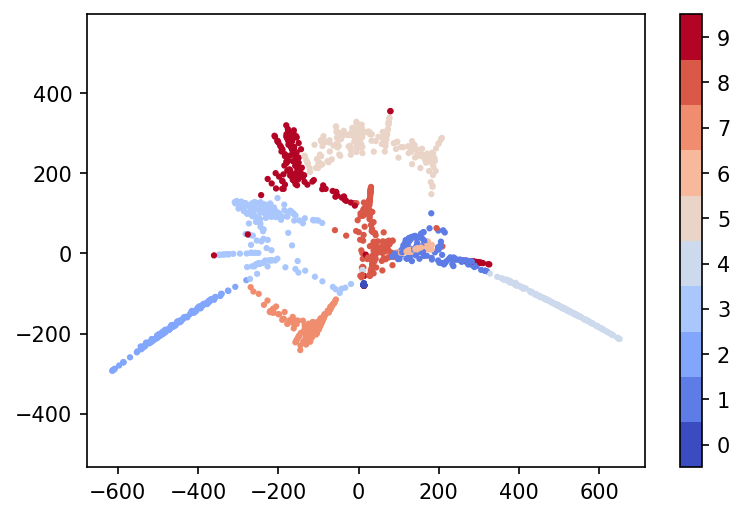

In [75]:
# isomap plot
plot_reduced_data(isomap_embedding, digits.target)

In [76]:
# B) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the other dataset than digits

In [77]:
from sklearn.datasets import load_wine

In [78]:
wines = load_wine()
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [79]:
wines['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [80]:
print(wines.data.shape)

(178, 13)


In [81]:
# tsne model reducing data to 2 dimensions
tsne = TSNE(2)  
tsne_embedding = tsne.fit_transform(wines.data)
print(tsne_embedding.shape)

(178, 2)


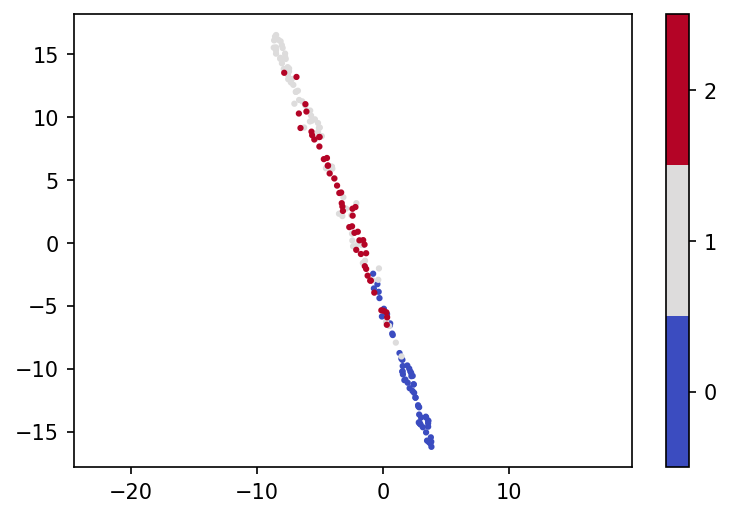

In [82]:
# tsne plot
plot_reduced_data(tsne_embedding, wines.target)

In [83]:
# isomap model
model3 = manifold.Isomap(n_neighbors=2, n_components=2) 
model3.fit(wines.data)
isomap_embedding = model3.transform(wines.data)
isomap_embedding.shape

(178, 2)

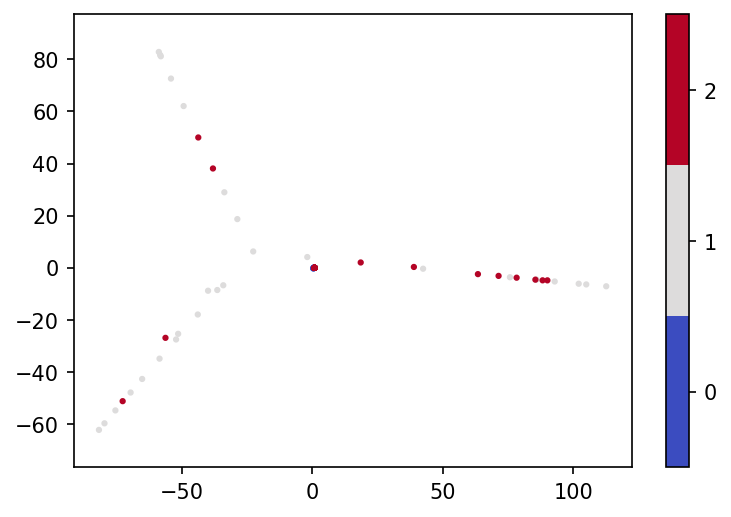

In [84]:
# isomap plot
plot_reduced_data(isomap_embedding, wines.target)

In [85]:
# C) Use 1 other clustering technique on Iris dataset, plot the results with UMAP as above

In [86]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal_length','sepal_width','petal_length','petal_width','species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [87]:
species = df.species
df = df.drop('species', axis = 1)
df = pd.DataFrame(StandardScaler().fit(df).transform(df))
df

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [88]:
# BIRCH method
bclust=Birch(branching_factor=100, threshold=.5).fit(df)
print(bclust)

Birch(branching_factor=100)


In [89]:
bclust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [90]:
model = umap.UMAP(random_state=42)

In [91]:
umap_embedding = model.fit(df).transform(df)

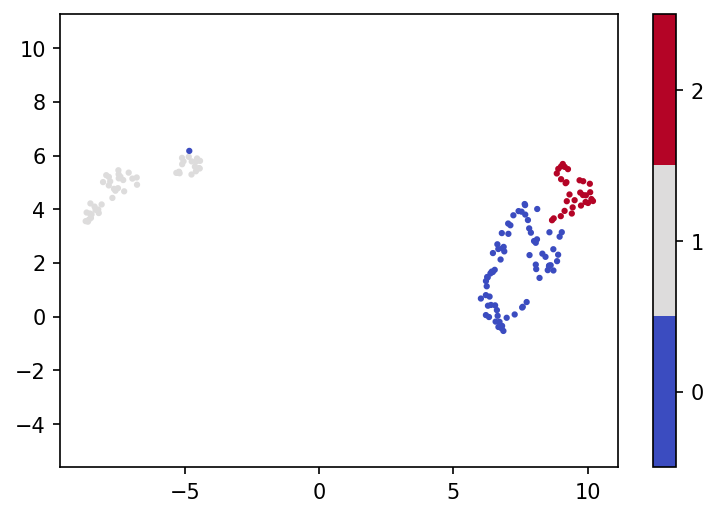

In [92]:
plot_reduced_data(umap_embedding, bclust.labels_)